In [4]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/Users/harshitgupta/Desktop/vs /VS-Data-Den/graphs/yearweek_rm_sales.csv')

In [5]:
data['PTNR_REGIONAL_MASTER_CD'].nunique()

72

In [35]:
data.columns

Index(['PTNR_REGIONAL_MASTER_CD', 'YEARWEEK', 'TOTAL_SALES'], dtype='object')

In [36]:
data = data.drop(columns='PTNR_REGIONAL_MASTER_CD')

In [37]:
data.head(20)

,YEARWEEK,TOTAL_SALES
0,201948,28994.45
1,201949,127699.87
2,201950,102609.00
3,202013,NaN
4,202022,37745.66
5,202023,72885.09
6,202024,57311.33
7,202025,35573.25
8,202026,20965.50
9,202027,10669.09


In [38]:
data = data[data['TOTAL_SALES'] > 1]

In [39]:
data['YEARWEEK'] = data['YEARWEEK'].astype(str)
data['YEARWEEK'] = pd.to_datetime(data['YEARWEEK'].str[:4] + '-' + data['YEARWEEK'].str[-2:] + '-1', format='%Y-%U-%w')

In [40]:
data.head(10)

,YEARWEEK,TOTAL_SALES
0,2019-12-02,28994.45
1,2019-12-09,127699.87
2,2019-12-16,102609.00
4,2020-06-01,37745.66
5,2020-06-08,72885.09
6,2020-06-15,57311.33
7,2020-06-22,35573.25
8,2020-06-29,20965.50
9,2020-07-06,10669.09
10,2020-07-13,24953.84


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data.describe()

,YEARWEEK,TOTAL_SALES
count,16247,1.624700e+04
mean,2020-12-23 12:14:34.795346944,2.936249e+05
min,2017-12-04 00:00:00,1.060000e+00
25%,2019-05-16 12:00:00,1.197103e+04
50%,2020-12-21 00:00:00,5.151714e+04
75%,2022-07-18 00:00:00,2.002779e+05
max,2024-03-18 00:00:00,2.177125e+07
std,NaN,1.082216e+06


In [53]:
training = data.iloc[:-2000,:]

In [55]:
training.count

<bound method DataFrame.count of         YEARWEEK  TOTAL_SALES
0     2019-12-02     28994.45
1     2019-12-09    127699.87
2     2019-12-16    102609.00
4     2020-06-01     37745.66
5     2020-06-08     72885.09
...          ...          ...
16317 2020-01-13      7490.85
16318 2020-01-20      5008.12
16319 2020-01-27      4737.06
16320 2020-02-03      3665.21
16321 2020-02-10      3471.81

[14247 rows x 2 columns]>

In [54]:
test = data.iloc[-1500:,:]

In [56]:
test.count

<bound method DataFrame.count of         YEARWEEK  TOTAL_SALES
16855 2022-07-04       129.70
16856 2022-07-11       129.70
16857 2022-07-18       129.70
16858 2022-07-25       129.70
16859 2022-08-01       254.34
...          ...          ...
18373 2024-02-05     16917.58
18374 2024-02-12     12848.38
18375 2024-02-19     20193.45
18376 2024-02-26     28072.44
18377 2024-03-04     22450.98

[1500 rows x 2 columns]>

In [57]:
data.head()

,YEARWEEK,TOTAL_SALES
0,2019-12-02,28994.45
1,2019-12-09,127699.87
2,2019-12-16,102609.00
4,2020-06-01,37745.66
5,2020-06-08,72885.09


In [58]:
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split

In [59]:
model=sm.tsa.statespace.SARIMAX(data['TOTAL_SALES'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/Users/harshitgupta/Desktop/vs /.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/harshitgupta/Desktop/vs /.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42834D+01    |proj g|=  1.01651D-01


 This problem is unconstrained.



At iterate    5    f=  1.42250D+01    |proj g|=  5.87997D-03

At iterate   10    f=  1.42172D+01    |proj g|=  1.32034D-02

At iterate   15    f=  1.42169D+01    |proj g|=  2.11139D-03

At iterate   20    f=  1.42168D+01    |proj g|=  4.79561D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     26      1     0     0   2.478D-05   1.422D+01
  F =   14.216762704142450     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [60]:
prediction = results.predict(start=test.index[0],end=test.index[-1])
data['sarimaxPred'] = prediction

/Users/harshitgupta/Desktop/vs /.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/harshitgupta/Desktop/vs /.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [61]:
import seaborn as sns

<Axes: xlabel='None', ylabel='TOTAL_SALES'>

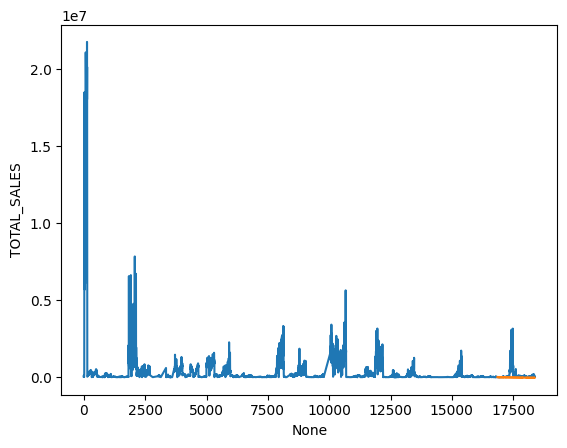

In [62]:
sns.lineplot(data=data,x=data.index,y='TOTAL_SALES')
sns.lineplot(data=data,x=data.index,y='sarimaxPred')


In [65]:
data.head(20)

,YEARWEEK,TOTAL_SALES,sarimaxPred
0,2019-12-02,2.899445e+04,NaN
1,2019-12-09,1.276999e+05,NaN
2,2019-12-16,1.026090e+05,NaN
4,2020-06-01,3.774566e+04,NaN
5,2020-06-08,7.288509e+04,NaN
6,2020-06-15,5.731133e+04,NaN
7,2020-06-22,3.557325e+04,NaN
8,2020-06-29,2.096550e+04,NaN
9,2020-07-06,1.066909e+04,NaN
10,2020-07-13,2.495384e+04,NaN


In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
np.sqrt(mean_squared_error(test['SALES'],prediction))

ValueError: Found input variables with inconsistent numbers of samples: [1500, 1523]